# Sparse-Group Lasso

## Reference

This refers to the following paper by Simon _et al._:
> A Sparse-group Lasso. 
> Noah Simon, Jerome Friedman, Trevor Hastie, Rob Tibshirani
> http://www.stanford.edu/~hastie/Papers/SGLpaper.pdf

## Problem statement

The idea here is to perform regression with a sparsity constraint on the variables to be used for regression. More precisely, we have gathered variables into groups and would like to enforce sparsity:

* at the group level (_ie._ variables corresponding to useless groups should all be ignored for regression) ;
* at the variable levels (_ie._ inside a useful groups, useless variables should not be considered in the regression model).

More formally, the problem is expressed (when considering the linear regression case) as minimizing (over $\beta$, given $X$ and $y$) the following quantity:

$$\frac{1}{2n}\left\|y - \sum_{l=1}^{m}X^{(l)}\beta^{(l)}\right\|^2_2 + (1 - \alpha) \lambda \sum_{l=1}^m \sqrt{p_l} \|\beta^{(l)}\|_2 + \alpha \lambda \|\beta\|_1$$

where $n$ is the number of samples (_ie._ number of rows in $X$ and $y$) and $m$ is the number of groups of variables (group $l$ being of size $p_l$).

At this point, we can visualize the penalties introduced in the loss function in a simple case where we have a single group made of two variables:

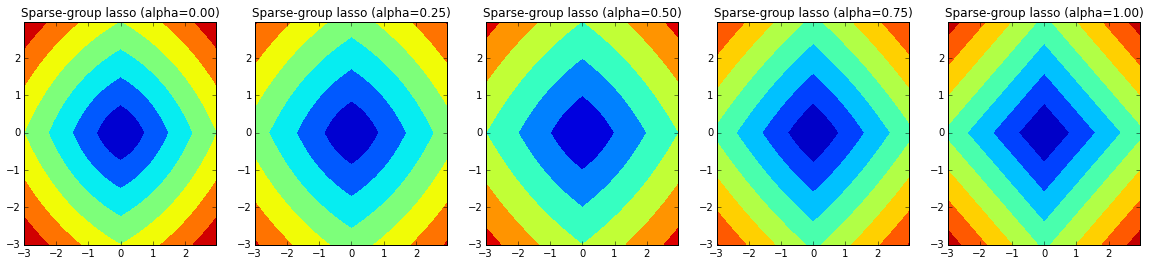

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(20, 4))

for i_alpha, alpha in enumerate([0., 0.25, 0.5, 0.75, 1.]):
    plt.subplot(1, 5, i_alpha + 1)
    Z_grouplasso_semisparse = (1 - alpha) * np.sqrt(X ** 2 + Y ** 2) + np.abs(X) + np.abs(Y)
    plt.contourf(X, Y, Z_grouplasso_semisparse)
    plt.title("Sparse-group lasso (alpha=%.2f)" % alpha)

## Proposed optimization scheme

In practice, authors show that the following criterion should be used to decide if group $l$ will be zero-ed out:

$$\left\|S\left(\frac{X^{(k) \top} r_{(-k)}}{n}, \alpha \lambda\right)\right\|_2 \leq (1-\alpha) \lambda$$

where $S$ is the coordinate-wise soft thresholding operator:

$$\left(S(z, \alpha \lambda)\right)_j = \text{sign}(z_j)(|z_j| - \alpha \lambda)_{+}$$

Then, inside each non-zero group, they provide an update rule for gradient descent (assuming other group coefficients fixed).

## Adaptation to fit my needs

For some application, I would need to enforce sparsity both at the group levels and on some variables of the groups but not all. In other words, the quantity to be minimized becomes:

$$\frac{1}{2n}\left\|y - \sum_{l=1}^{m}X^{(l)}\beta^{(l)}\right\|^2_2 + (1 - \alpha) \lambda \sum_{l=1}^m \sqrt{p_l} \|\beta^{(l)}\|_2 + \alpha \lambda |F^{\top}\beta|$$

where $F$ is an indicator vector of length $\beta$ containing ones on dimensions that should be pushed towards sparsity and zeros everywhere else.

The condition for a group to be zero-ed out is now:

$$\left\|S\left(\frac{X^{(k) \top} r_{(-k)}}{n}, \alpha \lambda F\right)\right\|_2 \leq (1-\alpha) \lambda$$

with:

$$\left(S(z, \alpha \lambda F)\right)_j = \text{sign}(z_j)(|z_j| - \alpha \lambda f_j)_{+}$$

The update rule for the gradient descent inside each group can be adapted  in a similar manner to my needs.

We can then visualize the penalties corresponding to this scheme (which I call Semi-Sparse-Group Lasso):

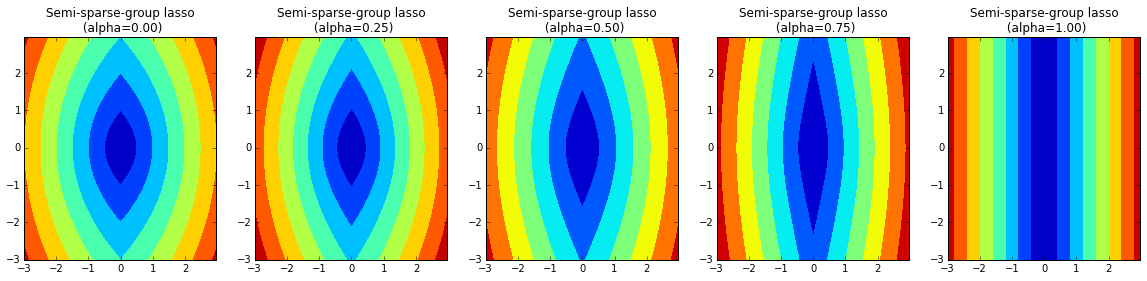

In [2]:
plt.figure(figsize=(20, 4))

for i_alpha, alpha in enumerate([0., 0.25, 0.5, 0.75, 1.]):
    plt.subplot(1, 5, i_alpha + 1)
    Z_grouplasso_semisparse = (1 - alpha) * np.sqrt(X ** 2 + Y ** 2) + np.abs(X)
    plt.contourf(X, Y, Z_grouplasso_semisparse)
    plt.title("Semi-sparse-group lasso\n (alpha=%.2f)" % alpha)